In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense,Dropout
from tensorflow import keras
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.optimizers import SGD,Adagrad,Adam
from keras.metrics import BinaryAccuracy,AUC
from keras.losses import BinaryCrossentropy
from keras.callbacks import EarlyStopping


In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_train

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0.0,1.0
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1.0,0.0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0.0,1.0
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1.0,0.0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102787,102787,40,145,60,83.0,0.9,0.8,1,1,119,...,87,124,13.9,1,0.6,20,25,29,0.0,0.0
102788,102788,70,160,60,80.0,0.6,1.0,1,1,130,...,58,64,15.9,1,1.1,31,17,52,0.0,0.0
102789,102789,35,170,80,81.0,1.5,1.5,1,1,128,...,41,147,15.8,1,1.1,24,35,36,0.0,0.0
102790,102790,45,165,70,88.0,1.2,1.5,1,1,134,...,51,141,15.7,1,1.0,20,20,27,0.0,1.0


In [ ]:
df_test


,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,159256,40,165,70,84.0,1.2,1.2,1,1,130,...,186,49,115,14.2,1,0.9,19,25,32,0
1,159257,80,160,60,93.0,1.0,1.0,2,2,144,...,158,35,104,13.0,1,1.1,20,12,24,0
2,159258,60,170,70,86.5,0.6,0.7,1,1,117,...,173,39,88,15.4,1,1.4,38,60,36,0
3,159259,40,160,50,67.0,0.3,0.4,1,1,116,...,47,75,128,14.5,1,0.6,25,18,10,1
4,159260,40,170,75,89.4,1.0,0.9,1,1,132,...,100,39,123,16.5,1,1.0,30,39,27,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106166,265422,40,165,60,78.0,0.8,0.9,1,1,112,...,82,59,149,16.4,1,1.1,24,31,28,0
106167,265423,40,170,85,95.0,1.2,1.2,1,1,130,...,186,44,100,16.0,2,1.0,25,31,38,0
106168,265424,35,170,85,89.0,1.2,1.2,1,1,131,...,76,53,142,15.9,1,0.8,33,32,24,1
106169,265425,40,160,60,67.0,0.7,0.8,1,1,120,...,81,55,103,13.9,1,0.6,42,36,32,0


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  int64  
 1   age                  159256 non-null  int64  
 2   height(cm)           159256 non-null  int64  
 3   weight(kg)           159256 non-null  int64  
 4   waist(cm)            159256 non-null  float64
 5   eyesight(left)       159256 non-null  float64
 6   eyesight(right)      159256 non-null  float64
 7   hearing(left)        159256 non-null  int64  
 8   hearing(right)       159256 non-null  int64  
 9   systolic             159256 non-null  int64  
 10  relaxation           159256 non-null  int64  
 11  fasting blood sugar  159256 non-null  int64  
 12  Cholesterol          159256 non-null  int64  
 13  triglyceride         159256 non-null  int64  
 14  HDL                  159256 non-null  int64  
 15  LDL              

In [ ]:
df_train.duplicated().sum()

0

In [ ]:
print(f'hearing(left) : \n{df_train["hearing(left)"].value_counts()}')
print(f'\nhearing(right) : \n{df_train["hearing(right)"].value_counts()}')
print(f'\nUrine protein : \n{df_train["Urine protein"].value_counts()}')
print(f'\ndental caries : \n{df_train["dental caries"].value_counts()}')

0.0    57790
1.0    45001
Name: smoking, dtype: int64


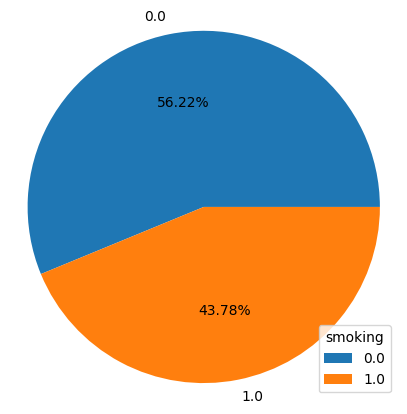

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
print(df_train['smoking'].value_counts())
fig, ax=plt.subplots(1,1,figsize=(5,5))
def plot_pie(column):
    ax.pie(column.value_counts(),autopct='%1.2f%%',labels=column.value_counts().index)
    ax.legend(column.value_counts().index).set_title(column.name)
    ax.axis('equal')

plot_pie(df_train['smoking'])

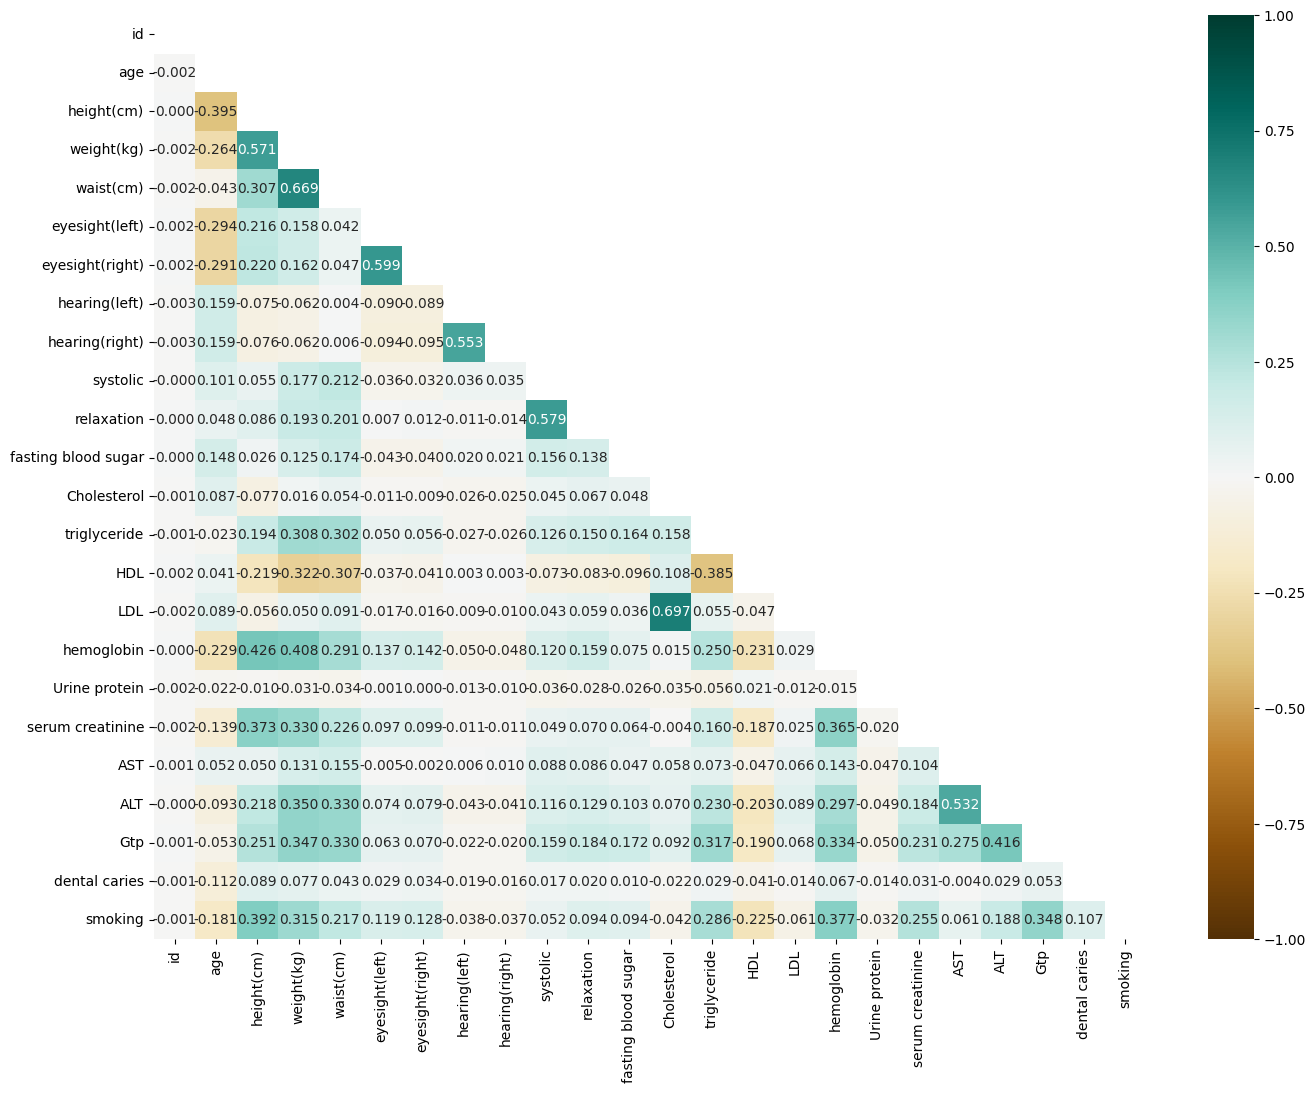

In [ ]:
corr = df_train.corr('kendall')
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(16, 12))
heatmap = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG',fmt = '.3f')

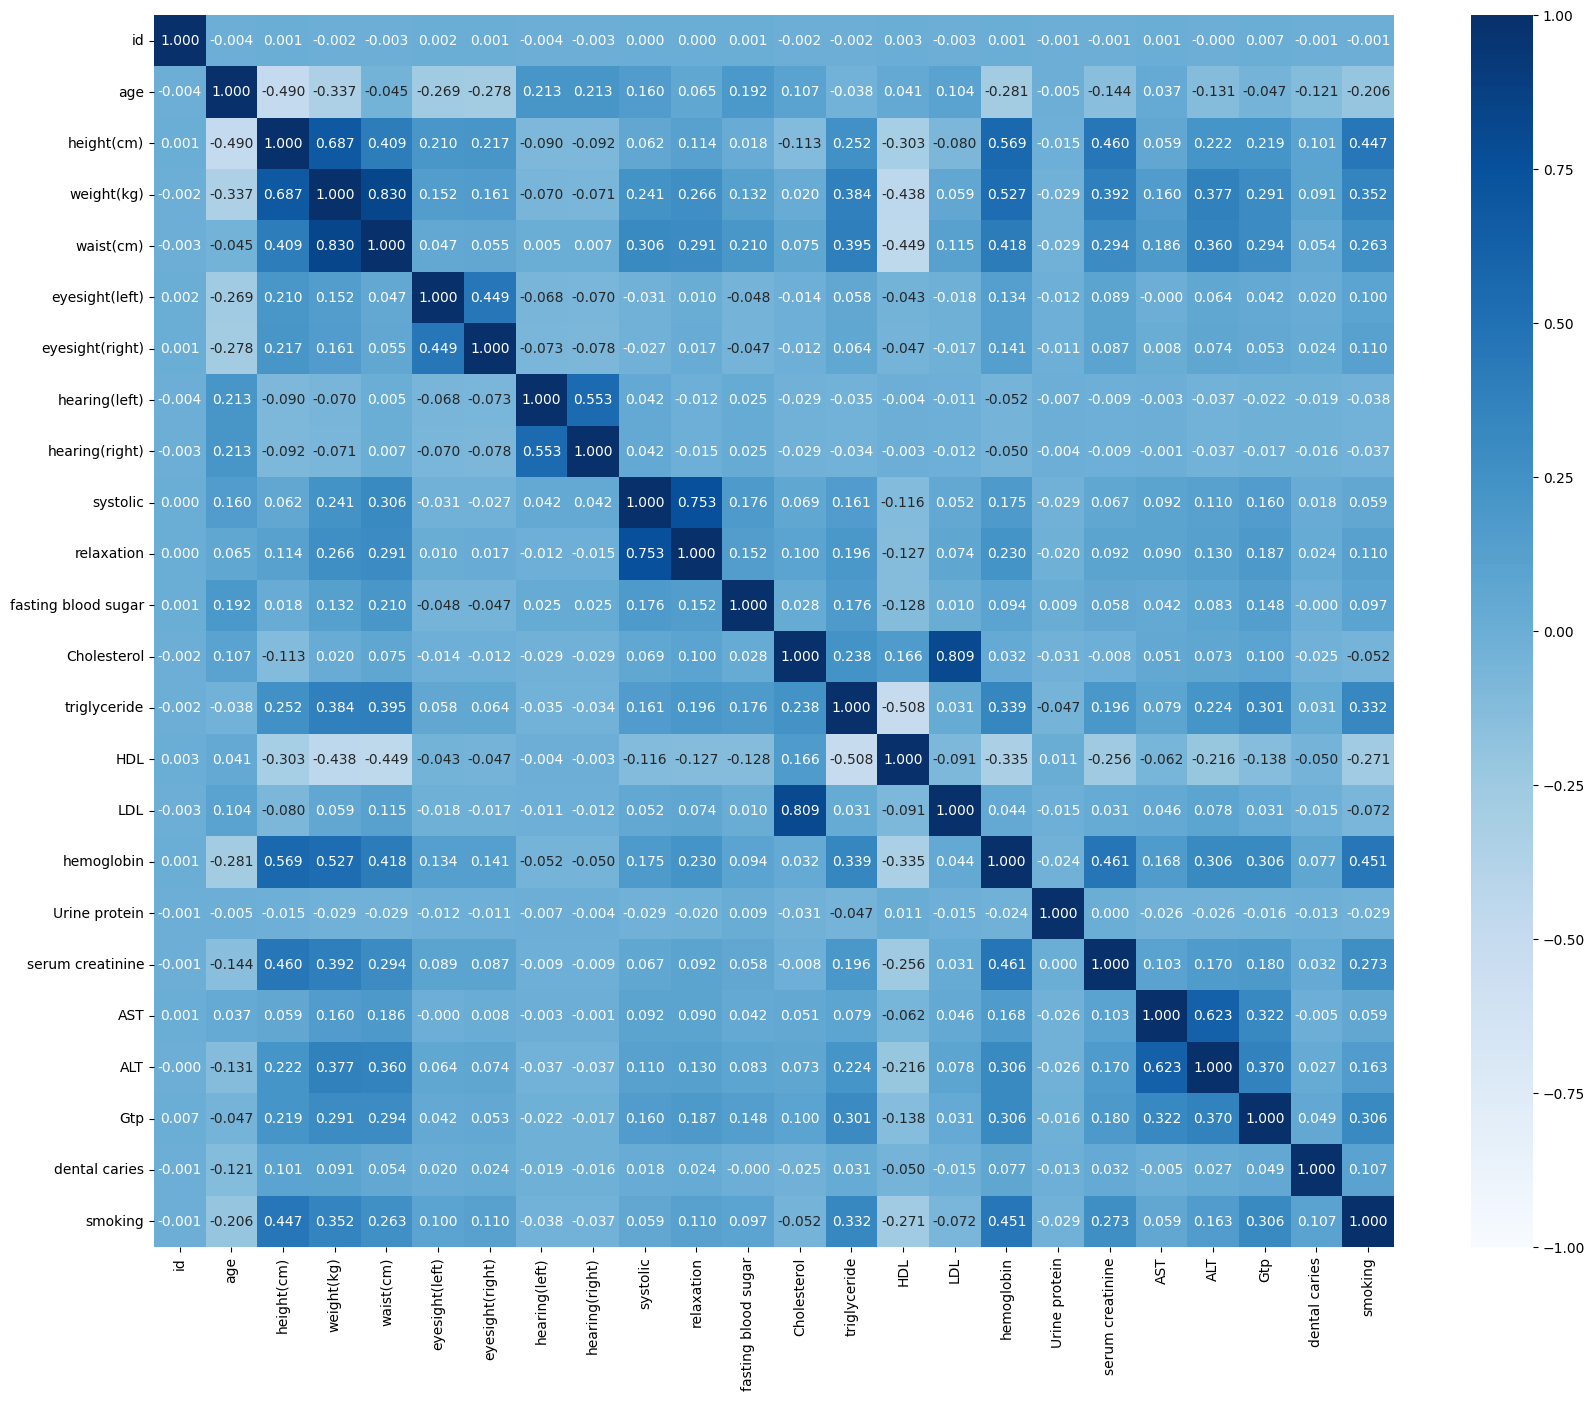

In [ ]:

corr = df_train.corr('kendall')
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=[20,16])
sns.heatmap(df_train.corr(), cmap="Blues", annot=True, vmin=-1, vmax=1,fmt = '.3f');
# cmap="coolwarm"

In [ ]:
"""X_train = df_train.drop(['id','smoking'], axis=1)
y_train = df_train['smoking']

X_test = df_test.drop(['id'], axis=1)
#y_test = df_test['smoking']
X_train.head()
"""

"X_train = df_train.drop(['id','smoking'], axis=1)\ny_train = df_train['smoking']\n\nX_test = df_test.drop(['id'], axis=1)\n#y_test = df_test['smoking']\nX_train.head()\n"

In [4]:
from sklearn.model_selection import train_test_split
X = df_train.drop(['id','smoking'],axis =1)
y = df_train['smoking']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state= 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.10,random_state=42)
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.10,random_state=5)

In [ ]:
X_test.shape ,y_test.shape

((31852, 22), (31852,))

In [ ]:
y_test

145654    1
49118     1
21769     1
108299    0
117130    0
         ..
11934     1
115975    0
158289    1
142308    0
85326     1
Name: smoking, Length: 31852, dtype: int64

In [ ]:
"""scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_train=scaler.fit_transform(X_test)
"""

In [ ]:
mlp=Sequential()

mlp.add(Dense(256,input_dim=22,activation = "relu"))
mlp.add(Dropout(0.1))
mlp.add(Dense(128,activation = "relu"))
mlp.add(Dropout(0.1))
mlp.add(Dense(64,activation = "relu"))
mlp.add(Dropout(0.1))
mlp.add(Dense(32,activation = "relu"))
mlp.add(Dropout(0.1))
mlp.add(Dense(16,activation = "relu"))
mlp.add(Dense(1,activation = "sigmoid"))
mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               5888      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.01)
mlp.compile(optimizer='adam', loss='binary_crossentropy',metrics=[AUC(name='auc')])

#mlp.compile(loss='binary_crossentropy',metrics=AUC(),optimizer='Adam')

In [ ]:
history=mlp.fit(X_train,y_train,epochs=50, batch_size=128,validation_split=0.10,verbose=1)

Epoch 1/50
896/896 [==============================] - 8s 7ms/step - loss: 0.6041 - auc: 0.7592 - val_loss: 0.5108 - val_auc: 0.8188
Epoch 2/50
896/896 [==============================] - 6s 6ms/step - loss: 0.5252 - auc: 0.8065 - val_loss: 0.5075 - val_auc: 0.8234
Epoch 3/50
896/896 [==============================] - 6s 7ms/step - loss: 0.5151 - auc: 0.8147 - val_loss: 0.4955 - val_auc: 0.8295
Epoch 4/50
896/896 [==============================] - 5s 6ms/step - loss: 0.5094 - auc: 0.8197 - val_loss: 0.4952 - val_auc: 0.8311
Epoch 5/50
896/896 [==============================] - 7s 7ms/step - loss: 0.5055 - auc: 0.8227 - val_loss: 0.4974 - val_auc: 0.8341
Epoch 6/50
896/896 [==============================] - 6s 6ms/step - loss: 0.5033 - auc: 0.8241 - val_loss: 0.4901 - val_auc: 0.8369
Epoch 7/50
896/896 [==============================] - 7s 8ms/step - loss: 0.5011 - auc: 0.8257 - val_loss: 0.4943 - val_auc: 0.8376
Epoch 8/50
896/896 [==============================] - 5s 6ms/step - loss: 0.

In [ ]:
#history=mlp.fit(X_train,y_train,epochs=250, batch_size=128,validation_data=(X_test,y_test),callbacks=EarlyStopping(patience=10),verbose=1)

In [ ]:
mlp.evaluate(X_test,y_test)

996/996 [==============================] - 2s 2ms/step - loss: 0.4868 - auc: 0.8410


[0.48678457736968994, 0.8410308957099915]

dict_keys(['loss', 'auc', 'val_loss', 'val_auc'])


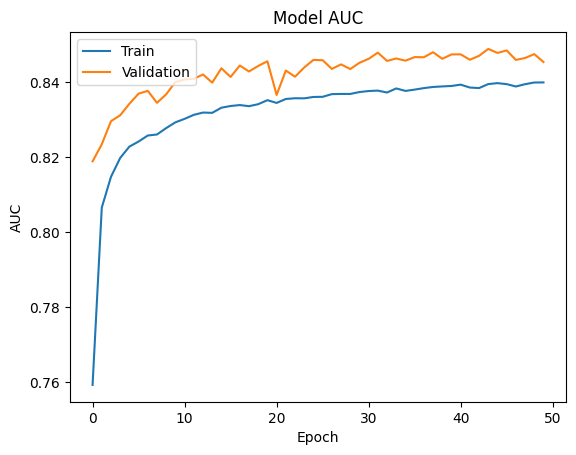

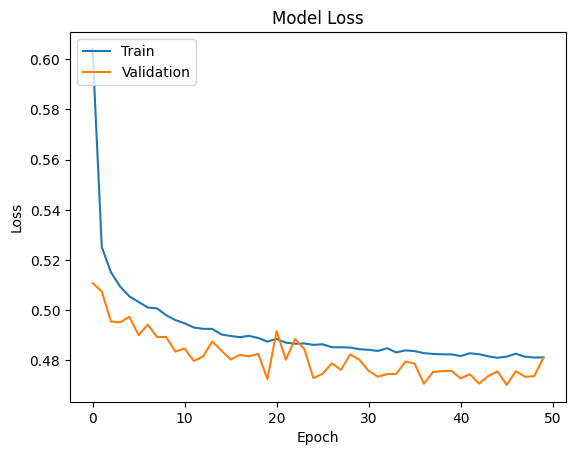

In [ ]:
import platform
import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('Model AUC')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
#PREDICT
df_pred = df_test.drop(['id'], axis=1)
#x_pred_scaled=scaler.fit_transform(df_pred)
y_pred=mlp.predict(df_pred)

3318/3318 [==============================] - 5s 2ms/step


In [ ]:
y_pred

array([[0.668105  ],
       [0.19018316],
       [0.48275077],
       ...,
       [0.45368722],
       [0.5218061 ],
       [0.07935518]], dtype=float32)

In [ ]:
"""y_pred = np.where(y_pred >= 0.5, 1, 0)
y_pred=y_pred.flatten()
y_pred"""

array([1, 0, 1, ..., 0, 1, 0])

In [ ]:
y_pred

array([[0.668105  ],
       [0.19018316],
       [0.48275077],
       ...,
       [0.45368722],
       [0.5218061 ],
       [0.07935518]], dtype=float32)

In [ ]:
result = pd.read_csv('sample_submission.csv')

In [ ]:
#result['id']=df_test["id"]
result['smoking'] = y_pred


In [ ]:
"""result = pd.DataFrame(
{
    "id": df_test["id"],
    "smoking": y_pred
})
result.head()"""

In [ ]:
result.to_csv('submission.csv',encoding="utf-8", index=False)